<a href="https://colab.research.google.com/github/codsalah/Machine-Learning-Projects/blob/main/Beautiful_Titanic_Ship_Classification%200_799.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'spaceship-titanic:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F34377%2F3220602%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240411%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240411T000631Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9464c02b0f3fa0c929d0a9e081c07cd4920a8b12333d2f81047e1f8341e0d8f9c14361f124360e0d95b0bd388cc469d3164e39258b47a7c23e2c8fc82ebb31d93aeaa8d637a8989b1a89b1a170b21432a6b94e8272da2a25644417105c42574b66ebf62421330b9f2e295996be8c12956aa4c0eee2e77bb3fd9da9476d505b1891d8401c21f72be05afe282ad2b03da97b610923db5f80ea8a844df4b9be5ba25be8cd46438ed8b695145e7d8c1e738fed83fffc4acab0640197056f157bdc75c8d28b9e449cfe1936aa7aa715a4e74bd2e087199382444f4386a7e001c5451caed9f549feffb4089c846f6868fc23a9d325444d6468e5c2b7475ca8f6db8e84'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 306403 bytes downloaded
Downloaded and uncompressed: spaceship-titanic
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/test.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/sample_submission.csv


# **introduction**

The story revolves around a spaceship named "Titanic" which was launched as an interstellar passenger liner about a month ago. It embarked on its maiden voyage with approximately 13,000 passengers on board. The objective of the journey was to transport emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

However, during the spaceship's journey while passing Alpha Centauri and heading towards its first destination, a planet called "55 Cancri E," an unexpected incident occurred. The Spaceship Titanic collided with a hidden spacetime anomaly concealed within a dust cloud. Tragically, this collision led to a situation similar to that experienced by the original Titanic ship a thousand years prior. Although the spaceship remained intact, nearly half of the passengers were transported to an alternate dimension.

In [3]:
pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 14.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=615ba09f6f74108aced45f57c62e2a10ab56cd28451a256ff89e70dde964ff99
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: se

In [4]:
!pip  install klib

# **importing libraries**

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

<ipython-input-5-ec27c30b8ccb>:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# **load the dataset**  


In [6]:
df_train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
df_submission = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")

In [7]:
profile = ProfileReport(df_train, title="Profiling Report")

In [8]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [9]:
df_train.isnull().mean()*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [10]:
df_train["Destination"].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [11]:
#Info About Data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## **data preprcessing**

In [12]:
# Calculate the mode for the column and fill the missing values with it

for col in df_train:
    if df_train[col].isnull().sum():
        mode = df_train[col].mode().iloc[0]
        df_train[col] = df_train[col].fillna(mode)

In [13]:
for col in df_test:
    if df_test[col].isnull().sum():
        mode = df_test[col].mode().iloc[0]
        df_test[col] = df_test[col].fillna(mode)

In [14]:
df_train.isnull().sum()


PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

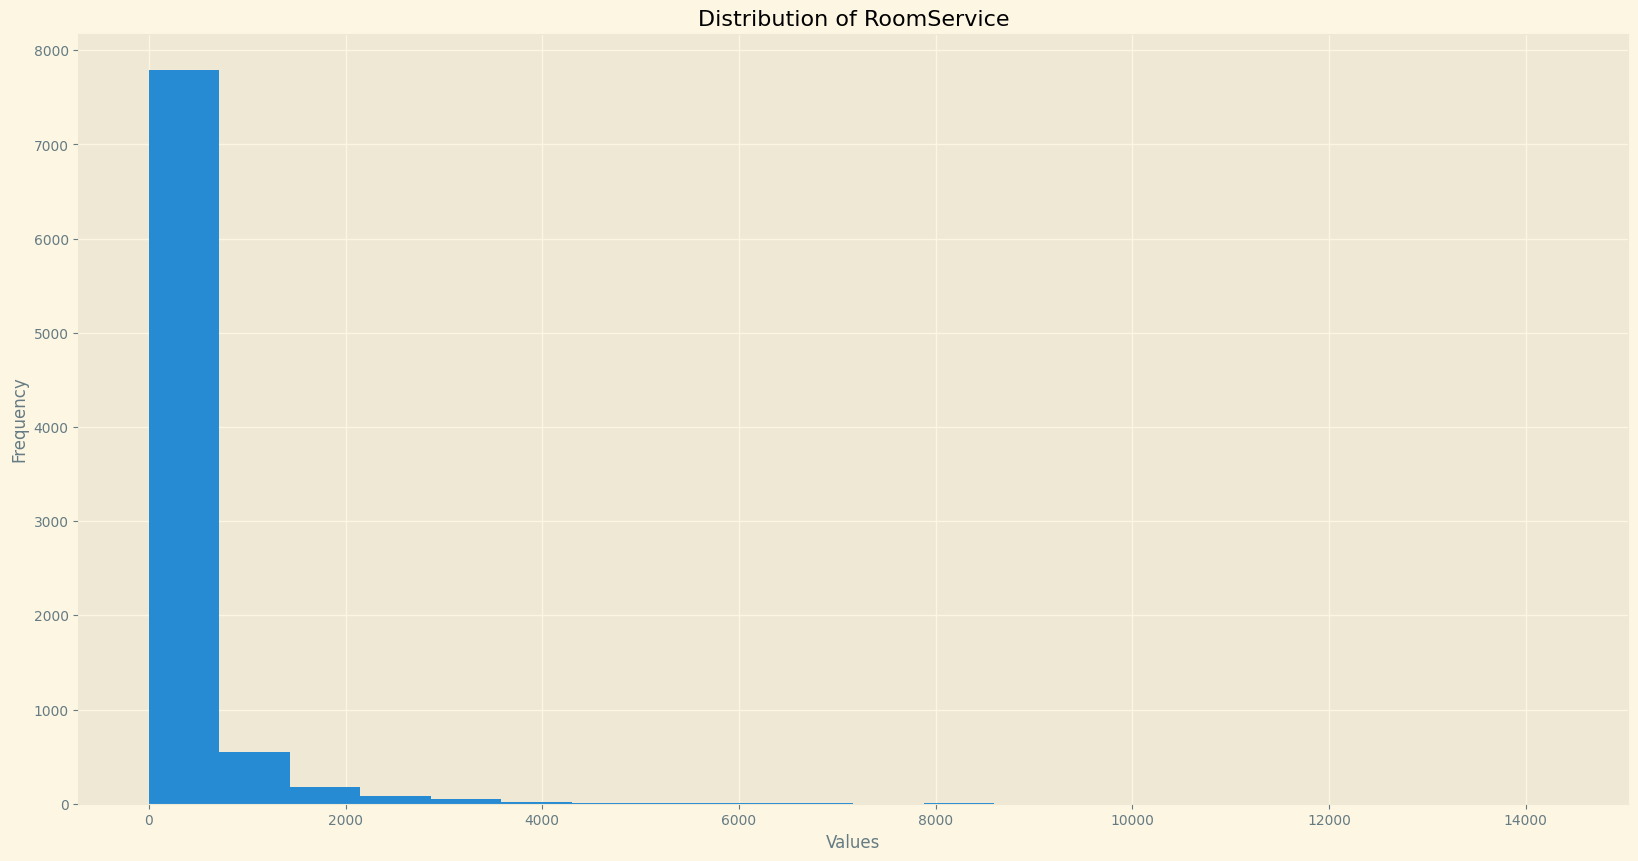

In [15]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,10))
plt.hist(df_train["RoomService"], bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of RoomService')
plt.show()

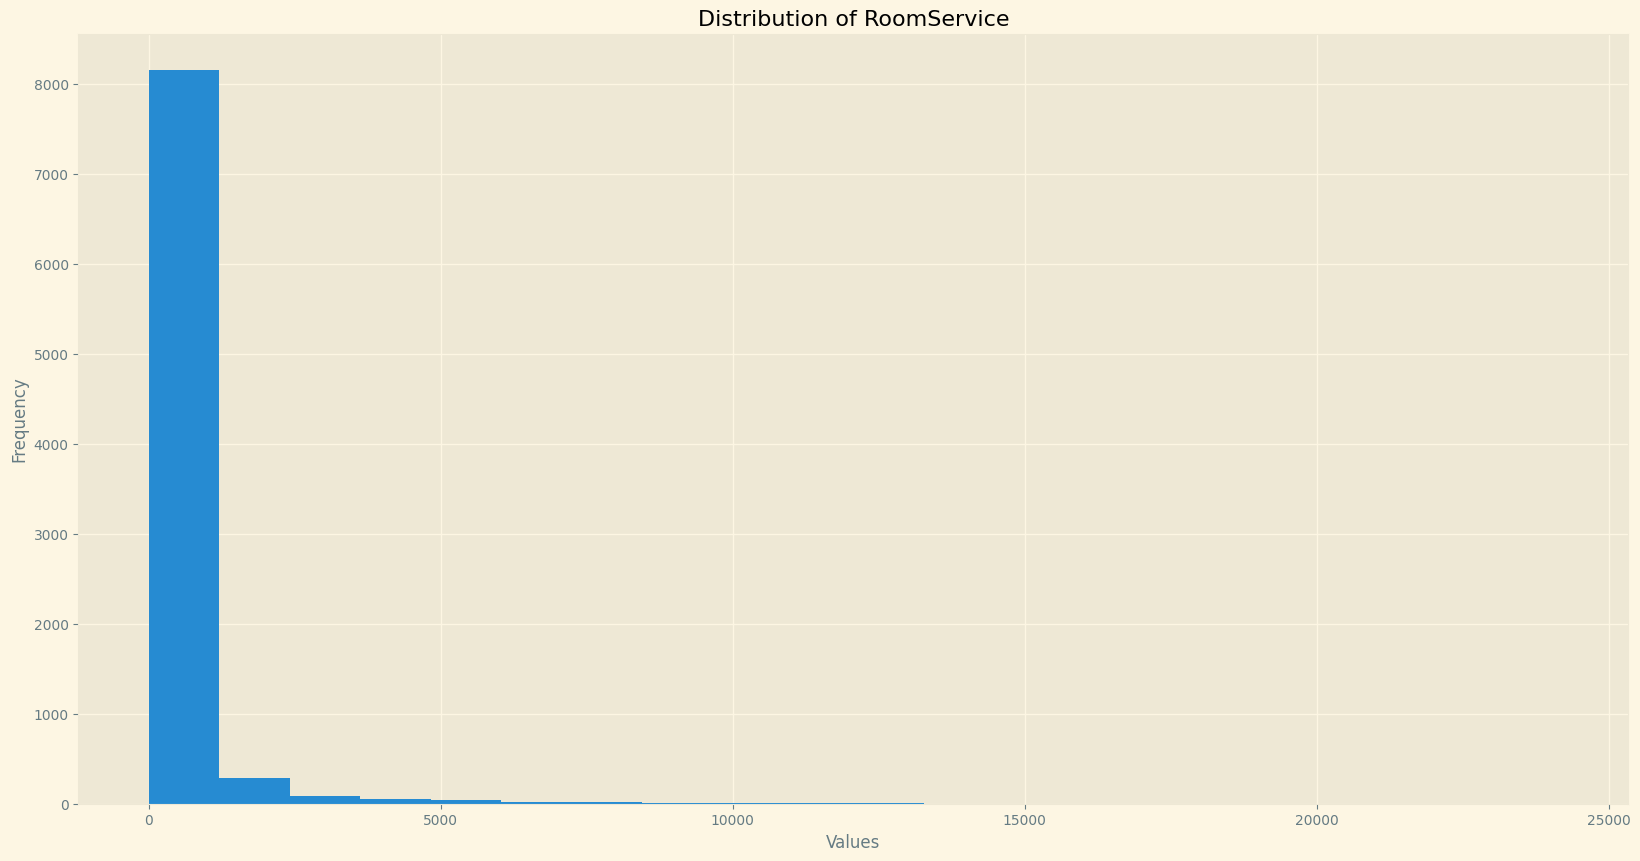

In [16]:
plt.figure(figsize=(20,10))
plt.hist(df_train["VRDeck"], bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of RoomService')
plt.show()

In [17]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df_train["HomePlanet"]= label_encoder.fit_transform(df_train["HomePlanet"])
df_train["Cabin"]= label_encoder.fit_transform(df_train["Cabin"])
df_train["Destination"]= label_encoder.fit_transform(df_train["Destination"])


df_test["HomePlanet"]= label_encoder.fit_transform(df_test["HomePlanet"])
df_test["Cabin"]= label_encoder.fit_transform(df_test["Cabin"])
df_test["Destination"]= label_encoder.fit_transform(df_test["Destination"])

In [18]:
df_train

AttributeError: 'Index' object has no attribute '_format_flat'

     PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0        0001_01           1      False    149            2  39.0  False   
1        0002_01           0      False   2184            2  24.0  False   
2        0003_01           1      False      1            2  58.0   True   
3        0003_02           1      False      1            2  33.0  False   
4        0004_01           0      False   2186            2  16.0  False   
...          ...         ...        ...    ...          ...   ...    ...   
8688     9276_01           1      False    146            0  41.0   True   
8689     9278_01           0       True   5280            1  18.0  False   
8690     9279_01           0      False   5285            2  26.0  False   
8691     9280_01           1      False   2131            0  32.0  False   
8692     9280_02           1      False   2131            2  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0     

In [19]:
y = df_train["Transported"]
X = df_train.drop(labels=["PassengerId", "Name", "Transported"], axis=1)
testing = df_test.drop(labels=["PassengerId", "Name"], axis=1)

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [21]:
X.head()

AttributeError: 'Index' object has no attribute '_format_flat'

   HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  RoomService  \
0           1      False    149            2  39.0  False          0.0   
1           0      False   2184            2  24.0  False        109.0   
2           1      False      1            2  58.0   True         43.0   
3           1      False      1            2  33.0  False          0.0   
4           0      False   2186            2  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  
0        0.0           0.0     0.0     0.0  
1        9.0          25.0   549.0    44.0  
2     3576.0           0.0  6715.0    49.0  
3     1283.0         371.0  3329.0   193.0  
4       70.0         151.0   565.0     2.0  

In [22]:
le = preprocessing.LabelEncoder()

columns_to_encode = ['CryoSleep', 'VIP']

for column in columns_to_encode:
    X[column] = le.fit_transform(X[column])

In [23]:
X = X.iloc[:,:].values

In [24]:
X

array([[1.000e+00, 0.000e+00, 1.490e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 2.184e+03, ..., 2.500e+01, 5.490e+02,
        4.400e+01],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 6.715e+03,
        4.900e+01],
       ...,
       [0.000e+00, 0.000e+00, 5.285e+03, ..., 1.872e+03, 1.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 2.131e+03, ..., 0.000e+00, 3.530e+02,
        3.235e+03],
       [1.000e+00, 0.000e+00, 2.131e+03, ..., 0.000e+00, 0.000e+00,
        1.200e+01]])

In [25]:
y

array([0, 1, 0, ..., 1, 0, 1])

# **classification models**

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


In [27]:
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(max_features='sqrt', n_estimators=200).fit(X_train, y_train)
pred_ = rfc.predict(X_test)
print(classification_report(y_test, pred_))
score = rfc.score(X_test, y_test)
print("Accuracy Score:", score)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1088
           1       0.81      0.79      0.80      1086

    accuracy                           0.80      2174
   macro avg       0.80      0.80      0.80      2174
weighted avg       0.80      0.80      0.80      2174

Accuracy Score: 0.8045078196872125


In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNeighborsClassifier with the desired parameters
knn = KNeighborsClassifier(n_neighbors=60).fit(X_train, y_train)
pred_2 = knn.predict(X_test)
print(classification_report(y_test, pred_2))
score = knn.score(X_test, y_test)
print("Accuracy Score:", score)

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1088
           1       0.75      0.83      0.79      1086

    accuracy                           0.78      2174
   macro avg       0.78      0.78      0.78      2174
weighted avg       0.78      0.78      0.78      2174

Accuracy Score: 0.7778288868445262


In [29]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0).fit(X_train, y_train)
pred_4 = svm.predict(X_test)
print(classification_report(y_test, pred_4))
score = svm.score(X_test, y_test)
print("Accuracy Score:", score)

              precision    recall  f1-score   support

           0       0.87      0.67      0.76      1088
           1       0.73      0.90      0.81      1086

    accuracy                           0.79      2174
   macro avg       0.80      0.79      0.78      2174
weighted avg       0.80      0.79      0.78      2174

Accuracy Score: 0.7870285188592456


In [30]:
from sklearn.naive_bayes import GaussianNB

naiveb = GaussianNB().fit(X_train, y_train)
pred_5 = naiveb.predict(X_test)
print(classification_report(y_test, pred_5))
score = naiveb.score(X_test, y_test)
print("Accuracy Score:", score)

              precision    recall  f1-score   support

           0       0.88      0.46      0.60      1088
           1       0.63      0.94      0.76      1086

    accuracy                           0.70      2174
   macro avg       0.75      0.70      0.68      2174
weighted avg       0.76      0.70      0.68      2174

Accuracy Score: 0.6968721251149954


In [31]:

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(X_train, y_train)

pred_6 = dtc.predict(X_test)
print(classification_report(y_test, pred_6))

score = dtc.score(X_test, y_test)
print("Accuracy Score:", score)

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1088
           1       0.74      0.75      0.74      1086

    accuracy                           0.74      2174
   macro avg       0.74      0.74      0.74      2174
weighted avg       0.74      0.74      0.74      2174

Accuracy Score: 0.7424103035878565
